In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import scipy.stats

In [21]:
df=pd.read_csv(r"C:\Users\Downloads\Carprod.csv")
df

,Prod_Line,car_prod
0,L1,46
1,L1,42
2,L1,44
3,L1,49
4,L1,41
5,L2,359
6,L2,43
7,L2,41
8,L2,49
9,L2,47


In [22]:
df1=df
le=LabelEncoder()

In [23]:
label= le.fit_transform(df1["Prod_Line"])
le.classes_

array(['L1', 'L2', 'L3'], dtype=object)

In [24]:
df1["Prod_Line1"]=label

In [37]:
df1

,Prod_Line,car_prod,Prod_Line1
0,L1,46,0
1,L1,42,0
2,L1,44,0
3,L1,49,0
4,L1,41,0
5,L2,359,1
6,L2,43,1
7,L2,41,1
8,L2,49,1
9,L2,47,1


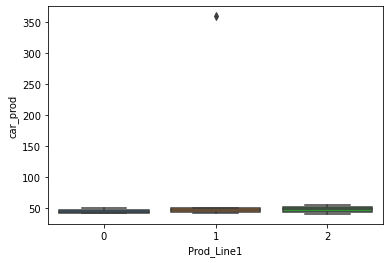

In [38]:
sns.boxplot(x=df['Prod_Line1'],y=df['car_prod'])
plt.show()

In [26]:
cor=df.corr()
cor

,car_prod,Prod_Line1
car_prod,1.000000,0.014602
Prod_Line1,0.014602,1.000000


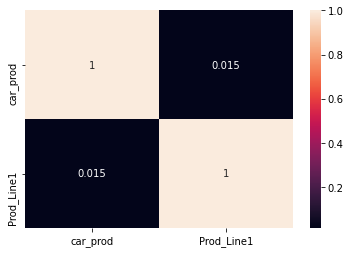

In [27]:
sns.heatmap(cor,annot=True)
plt.show()

Null Hypothesis (H0) : if the three production lines are working with same capacity.
Alternate Hypothesis(H1): three production lines are working with greater capacity or lesser capacity

In [28]:
res=ols(data=df,formula="car_prod ~ C(Prod_Line1) ").fit()

In [29]:
res.summary()

H:\New folder\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car_prod   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9736
Date:                Sat, 16 Jan 2021   Prob (F-statistic):              0.406
Time:                        10:35:21   Log-Likelihood:                -85.561
No. Observations:                  15   AIC:                             177.1
Df Residuals:                      12   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             44.4000     36.306      1.223      0.245     -34.705     123.505
C(Prod_Line1)[T.1]    63.4000     51.345      1.235      0.241     -48.471     175.271
C(Prod_Line1)[T.2]     2.8000     51.345      0.055      0.957    -109.071     114.671
==============================================================================
Omnibus:                       29.421   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.780
Skew:                           2.586   Prob(JB):                     1.89e-10
Kurtosis:                       9.700   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
table=sm.stats.anova_lm(res,type="1")

In [31]:
print(table)

                 df        sum_sq      mean_sq         F    PR(>F)
C(Prod_Line1)   2.0  12832.933333  6416.466667  0.973559  0.405677
Residual       12.0  79088.800000  6590.733333       NaN       NaN


In [32]:
"""
if p>0.05 its null hypothesis , is not statistically significant,impact of all sub group is equal
if p<0.05 its vice versa u1!=u2!=u3
"""

'\nif p>0.05 its null hypothesis , is not statistically significant,impact of all sub group is equal\nif p<0.05 its vice versa u1!=u2!=u3\n'

In [33]:
m_comp = pairwise_tukeyhsd(endog=df['car_prod'], groups=df['Prod_Line1'], alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1     63.4 0.4579  -73.5137 200.3137  False
     0      2      2.8    0.9 -134.1137 139.7137  False
     1      2    -60.6 0.4877 -197.5137  76.3137  False
-------------------------------------------------------


In [34]:
#critical value
print(scipy.stats.f.ppf(q=1-0.05,dfn=2,dfd=12))

3.8852938346523933
